Time series prediction using RNN – weather forecasting 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 1. Load Dataset

# Download Jena dataset: https://www.kaggle.com/datasets/stytch16/jena-climate-2009-2016
df = pd.read_csv("jena_climate_2009_2016.csv")

# We'll predict temperature ("T (degC)")
data = df["T (degC)"].values.reshape(-1,1)

In [3]:
df.shape

(420551, 15)

In [4]:
# 2. Preprocessing

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50  # number of time steps
X, y = create_sequences(data_scaled, seq_length)

# Split train/test
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [5]:
# 3. Build RNN Model

model = Sequential()
model.add(SimpleRNN(64, activation="tanh", input_shape=(seq_length, 1)))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")
print(model.summary())

c:\Users\Rugved\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
# 4. Train

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - loss: 1.7993e-04 - val_loss: 1.8571e-05
Epoch 2/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - loss: 1.7801e-05 - val_loss: 1.2300e-05
Epoch 3/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step - loss: 1.3779e-05 - val_loss: 1.1917e-05
Epoch 4/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - loss: 1.3284e-05 - val_loss: 1.2440e-05
Epoch 5/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - loss: 1.2935e-05 - val_loss: 1.1721e-05
Epoch 6/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 53s 10ms/step - loss: 1.2873e-05 - val_loss: 1.2598e-05
Epoch 7/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 36s 7ms/step - loss: 1.2759e-05 - val_loss: 1.7663e-05
Epoch 8/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - loss: 1.2688e-05 - val_loss: 1.2003e-05
Epoch 9/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.2655e-05 - val_loss: 1.4755e-05
Epoch 10/10
5257/5257 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - loss: 1.2677e-05 - val_loss: 1.5458e-05


In [7]:
# 5. Evaluate

loss = model.evaluate(X_test, y_test)
print("Test MSE:", loss)

2629/2629 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1.5458e-05
Test MSE: 1.5458417692570947e-05


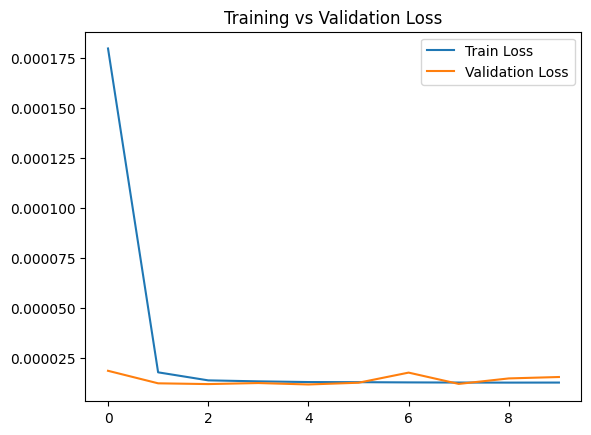

In [8]:
# 6. Plot Training Curves

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [11]:
# 7. Make Predictions

y_pred = model.predict(X_test)

# Inverse scale
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)



2629/2629 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


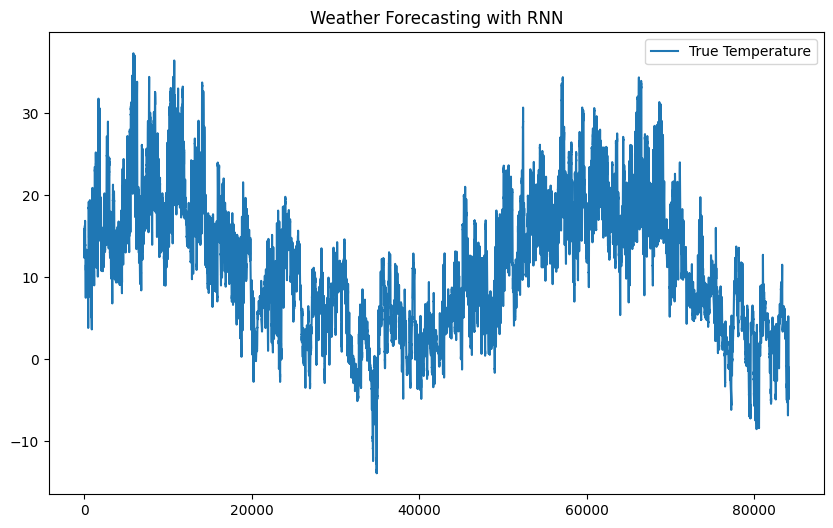

In [12]:
plt.figure(figsize=(10,6))
plt.plot(y_test_inv, label="True Temperature")
plt.legend()
plt.title("Weather Forecasting with RNN")
plt.show()

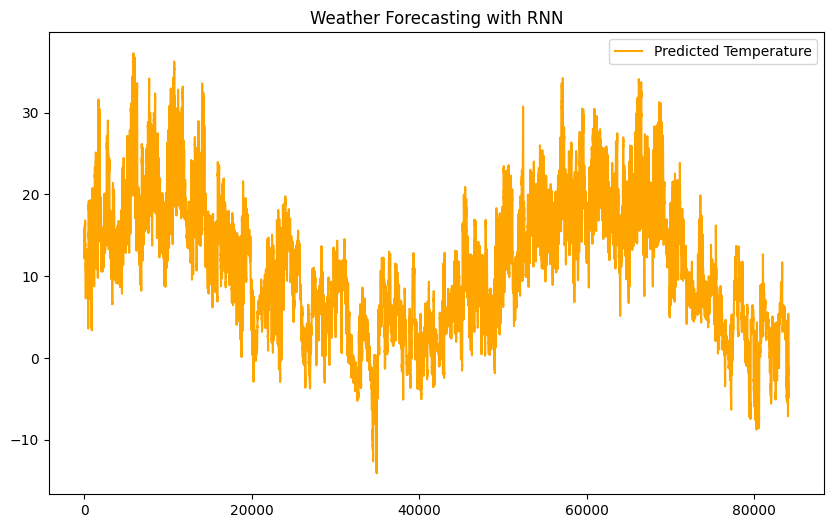

In [14]:
plt.figure(figsize=(10,6))
plt.plot(y_pred_inv, label="Predicted Temperature", color='orange')
plt.legend()
plt.title("Weather Forecasting with RNN")
plt.show()